In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from tqdm import tqdm
import logging
import sys
sys.path.append('../utils')
from utils import get_logger, Clock
from IPython.display import clear_output

In [2]:
logger = logging.getLogger(__name__)
logger = get_logger(logger=logger)

In [3]:
filepath = 'C:\\Users\\User\\Desktop\\8º período\\MSI I\\Repositórios\\itemset_mining_applied_to_pokemon_teams\\'

df1 = pd.read_csv(filepath + 'data\\processed\\pokemon_teams.csv')
logger.info(f"O primeiro dataframe contém {df1.shape[0]} equipes.")
df2 = pd.read_csv(filepath + 'data\\processed\\ladder_teams.csv')
logger.info(f"O segundo dataframe contém {df2.shape[0]} equipes.")

2022-10-22 18:23:16,734 - INFO - O primeiro dataframe contém 4340 equipes.
2022-10-22 18:23:16,792 - INFO - O segundo dataframe contém 16447 equipes.


In [4]:
logger.info("Concatenando os dois dataframes...")
all_teams_df = pd.concat([df1, df2]).reset_index(drop=True)
all_teams_df.to_csv(filepath + 'data\\processed\\merged_teams.csv', index=False)
logger.info("O dataframe resultante foi exportado como 'merged_teams.csv'.")
logger.info(f"O dataframe resultante contém {all_teams_df.shape[0]} equipes.")

2022-10-22 18:23:16,808 - INFO - Concatenando os dois dataframes...
2022-10-22 18:23:16,881 - INFO - O dataframe resultante foi exportado como 'merged_teams.csv'.
2022-10-22 18:23:16,882 - INFO - O dataframe resultante contém 20787 equipes.


In [5]:
pokemons = all_teams_df.stack().reset_index(drop=True)
unique_pokemons = pokemons.unique()

logger.info(f'Existem {len(unique_pokemons)} pokémons diferentes no dataset!')

2022-10-22 18:23:16,920 - INFO - Existem 578 pokémons diferentes no dataset!


In [6]:
print(all_teams_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20787 entries, 0 to 20786
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pokemon_1  20787 non-null  object
 1   pokemon_2  20787 non-null  object
 2   pokemon_3  20787 non-null  object
 3   pokemon_4  20787 non-null  object
 4   pokemon_5  20787 non-null  object
 5   pokemon_6  20787 non-null  object
dtypes: object(6)
memory usage: 974.5+ KB
None


Como podemos ver, não existem valores nulos no dataset!

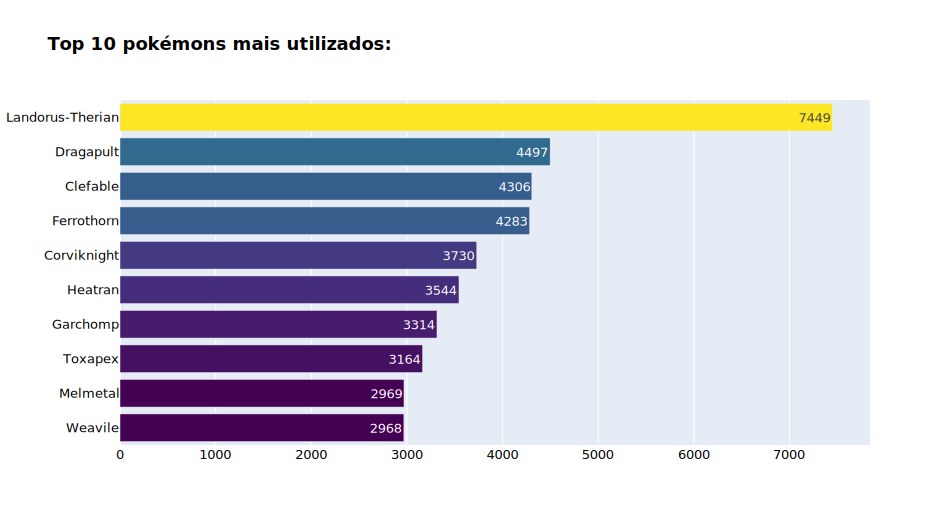

In [7]:
top10_most_used = pokemons.value_counts()[:10].sort_values()

fig = go.Figure(go.Bar(
            y=top10_most_used.index,
            x=top10_most_used.values,
            orientation='h',
            marker=dict(color = top10_most_used, colorscale='viridis'),
            hovertemplate='Usado %{x} vezes<extra></extra>',
            text=top10_most_used.values,
            textposition='auto'))
fig.update_layout(width=950,
                  height=525,
                  title_text="<b>Top 10 pokémons mais utilizados:<b>",
                  font_family="Century Gothic Medium",
                  font_color="black",
                  title_font_family="Century Gothic",
                  font_size=13)

fig.show(renderer="svg")

Ao que parece, _Landorus-Therian_, _Dragapult_ e _Clefable_ são os pokémons mais populares nessa _tier_.

Vamos fazer os imports necessários para a mineração de padrões frequentes:

In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

Vamos converter o dataset de equipes para o formato que o algoritmo _fpgrowth_ espera como entrada:

In [10]:
tr_encoder = TransactionEncoder()
tr_encoder = tr_encoder.fit(all_teams_df.values)
tr_arr = tr_encoder.transform(all_teams_df.values)
tr_arr = tr_arr.astype("int")

In [11]:
tr_team_df = pd.DataFrame(tr_arr, columns=tr_encoder.columns_)
tr_team_df.head()

,Abomasnow,Abra,Absol,Absol-Mega,Accelgor,Aegislash,Aerodactyl,Aggron,Aggron-Mega,Alakazam,Alcremie,Alcremie-Lemon-Cream,Altaria,Altaria-Mega,Amoonguss,Ampharos-Mega,Appletun,Appletun-Gmax,Araquanid,Arcanine,Archen,Archeops,Arctovish,Arctozolt,Armaldo,Aromatisse,Aron,Articuno,Articuno-Galar,Audino,Audino-Mega,Aurorus,Avalugg,Azelf,Azumarill,Barbaracle,Barraskewda,Beartic,Beedrill-Mega,Beheeyem,Bellossom,Bewear,Bisharp,Blacephalon,Blastoise,Blaziken,Blissey,Boldore,Boltund,Bouffalant,Braviary,Brionne,Bronzong,Bronzor,Bruxish,Butterfree,Buzzwole,Calyrex,Calyrex-Ice,Calyrex-Shadow,Camerupt-Mega,Carkol,Carracosta,Carvanha,Celebi,Celesteela,Centiskorch,Centiskorch-GMax,Centiskorch-Gmax,Chandelure,Chansey,Charizard,Charizard-Gmax,Charizard-Mega-X,Charjabug,Charmeleon,Cinccino,Cinderace,Clawitzer,Claydol,Clefable,Clefairy,Cloyster,Coalossal,Cobalion,Cofagrigus,Combusken,Comfey,Conkeldurr,Copperajah,Copperajah-Gmax,Corsola,Corsola-Galar,Corviknight,Corviknight-Gmax,Cradily,Cramorant,Crawdaunt,Cresselia,Crobat,Crustle,Cryogonal,Cursola,Darmanitan,Darmanitan-Galar,Darumaka,Decidueye,Delibird,Dhelmise,Dialga,Diancie,Diancie-Mega,Diggersby,Diglett,Ditto,Dottler,Doublade,Dracovish,Dracozolt,Dragalge,Dragapult,Dragonite,Drakloak,Drampa,Drapion,Drednaw,Drednaw-Gmax,Drifblim,Drilbur,Druddigon,Dubwool,Dugtrio,Dugtrio-Alola,Dunsparce,Duosion,Duraludon,Durant,Dusclops,Dusknoir,Eevee,Eiscue,Eldegoss,Electabuzz,Electivire,Emolga,Empoleon,Entei,Escavalier,Espeon,Eternatus,Excadrill,Exeggutor,Exeggutor-Alola,Exploud,Falinks,Farfetch’d,Farfetch’d-Galar,Ferroseed,Ferrothorn,Flapple,Flareon,Fletchinder,Fletchling,Flygon,Forretress,Fraxure,Froslass,Frosmoth,Gabite,Gallade,Galvantula,Garbodor,Garchomp,Garchomp-Mega,Gardevoir,Gastly,Gastrodon,Gastrodon-East,Genesect,Genesect-*,Genesect-Douse,Gengar,Gengar-Gmax,Gigalith,Giratina,Glaceon,Glalie,Glastrier,Gliscor,Gloom,Gogoat,Golbat,Golduck,Golem-Alola,Golisopod,Golurk,Goodra,Gothita,Gothitelle,Gourgeist-*,Gourgeist-Super,Granbull,Grapploct,Graveler,Greedent,Greninja,Grimmsnarl,Grimmsnarl-Gmax,Groudon,Gurdurr,Guzzlord,Gyarados,Hakamo-o,Hariyama,Hatterene,Hatterene-Gmax,Hattrem,Haunter,Hawlucha,Haxorus,Heatmor,Heatran,Heliolisk,Heracross,Hippopotas,Hippowdon,Hitmonchan,Hitmonlee,Hitmontop,Ho-Oh,Honedge,Hoopa-Unbound,Hydreigon,Hypno,Incineroar,Indeedee,Indeedee-F,Inteleon,Ivysaur,Jellicent,Jirachi,Jolteon,Jumpluff,Jynx,Kabutops,Kadabra,Kangaskhan,Kartana,Keldeo,Keldeo-Resolute,Kingdra,Kingler,Klang,Klefki,Klinklang,Koffing,Kommo-o,Krokorok,Krookodile,Kyogre,Kyurem,Kyurem-Black,Kyurem-White,Lampent,Landorus,Landorus-Therian,Lanturn,Lapras,Lapras-Gmax,Larvesta,Latias,Latios,Leafeon,Lickilicky,Lickitung,Liepard,Lileep,Lilligant,Linoone,Linoone-Galar,Lopunny,Lucario,Ludicolo,Lugia,Lunala,Lunatone,Lurantis,Luxray,Lycanroc,Lycanroc-Dusk,Lycanroc-Midnight,Machamp,Machoke,Magearna,Magearna-Original,Magikarp,Magmar,Magmortar,Magnemite,Magneton,Magnezone,Malamar,Mamoswine,Mandibuzz,Manectric,Mantine,Maractus,Mareanie,Marill,Marowak,Marowak-Alola,Marshadow,Marshtomp,Mawile-Mega,Melmetal,Meltan,Meowstic,Mesprit,Metagross,Mew,Mewtwo,Mienshao,Milotic,Miltank,Mimikyu,Moltres,Moltres-Galar,Morgrem,Morpeko,Mr. Mime,Mr. Mime-Galar,Mr. Rime,Mudbray,Mudsdale,Muk,Munchlax,Musharna,Naganadel,Natu,Necrozma,Necrozma-Dawn-Wings,Necrozma-Dusk-Mane,Nidoking,Nidoqueen,Nihilego,Nincada,Ninetales,Ninetales-Alola,Ninjask,Noctowl,Noivern,Obstagoon,Octillery,Oddish,Omanyte,Omastar,Onix,Oranguru,Orbeetle,Palkia,Palossand,Palpitoad,Pangoro,Passimian,Pawniard,Pelipper,Perrserker,Persian,Persian-Alola,Phantump,Pheromosa,Pikachu,Pikachu-Sinnoh,Pikachu-Unova,Piloswine,Pincurchin,Pinsir,Pinsir-Mega,Politoed,Poliwrath,Polteageist,Polteageist-Antique,Ponyta,Porygon,Porygon-Z,Porygon2,Primarina,Pumpkaboo-*,Pumpkaboo-Super,Pupitar,Pyukumuku,Quagsire,Qwilfish,Raboot,Raichu,Raichu-Alola,Raikou,Rapidash,Rapidash-Galar,Rayquaza,Regice,Regidrago,Regieleki,Regigigas,Regirock,Registeel,Reshiram,Reuniclus,Rhydon,Rhyperior,Ribombee,Rillaboom,Riolu,Roselia,Rosera

Vamos aplicar o algoritmo _fpgrowth_ nos dados com vários valores de _min_support_ para visualizar quais são os itemsets frequentes para cada suporte:

In [12]:
supports = [0.2, 0.1, 0.05, 0.01]
logger.info("A iteração começará agora...")
iteration_time = Clock("Cálculo dos itemsets frequentes para 20, 10, 5 e 1%")
for support in supports:
    freq_itemsets = fpgrowth(tr_team_df, min_support=support, use_colnames=True)
    freq_itemsets = freq_itemsets.sort_values(by='support', ascending=False).reset_index(drop=True)
    freq_itemsets['support'] = [str(round(support * 100, 2)) + '%' for support in freq_itemsets['support']]
    print(f"Com {round(support * 100, 2)}% de suporte:")
    display(freq_itemsets)
    print("---------------------")
iteration_time.stop_watch()

2022-10-22 18:23:22,044 - INFO - A iteração começará agora...


Com 20.0% de suporte:


C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,35.83%,(Landorus-Therian)
1,21.6%,(Dragapult)
2,20.71%,(Clefable)
3,20.6%,(Ferrothorn)


---------------------


C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



Com 10.0% de suporte:


,support,itemsets
0,35.83%,(Landorus-Therian)
1,21.6%,(Dragapult)
2,20.71%,(Clefable)
3,20.6%,(Ferrothorn)
4,17.94%,(Corviknight)
5,17.05%,(Heatran)
6,15.94%,(Garchomp)
7,15.21%,(Toxapex)
8,14.25%,(Weavile)
9,14.23%,(Melmetal)


---------------------


C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



Com 5.0% de suporte:


,support,itemsets
0,35.83%,(Landorus-Therian)
1,21.6%,(Dragapult)
2,20.71%,(Clefable)
3,20.6%,(Ferrothorn)
4,17.94%,(Corviknight)
5,17.05%,(Heatran)
6,15.94%,(Garchomp)
7,15.21%,(Toxapex)
8,14.25%,(Weavile)
9,14.23%,(Melmetal)


---------------------


C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



Com 1.0% de suporte:


,support,itemsets
0,35.83%,(Landorus-Therian)
1,21.6%,(Dragapult)
2,20.71%,(Clefable)
3,20.6%,(Ferrothorn)
4,17.94%,(Corviknight)
...,...,...
496,1.01%,"(Melmetal, Toxapex)"
497,1.01%,"(Weavile, Dragonite)"
498,1.01%,(Charizard)
499,1.0%,"(Rillaboom, Magnezone)"


2022-10-22 18:23:23,226 - INFO - Cálculo dos itemsets frequentes para 20, 10, 5 e 1% levou 01s para ser executado.


---------------------


O itemset mais frequente possui suporte relativo de 35.83% e trata-se de apenas um pokémon, _Landorus-Therian_, o que não é nenhuma surpresa dado que o gráfico de barras horizontes no início desse notebook já nos mostrava isso.

Pelo que podemos ver, para um suporte acima de 9.93%, já não existe mais itemsets frequentes com mais de um pokémon. Portanto, para explorarmos pokémons que aparecem juntos, teremos que testar suportes bem pequenos.

Pensando em regras de associação do formato X -> Y, vamos relembrar os conceitos de algumas métricas:
- Confidence: expressa a chance do pokémon Y ser escolhido para a equipe dado que o pokémon X foi escolhido.
- Lift: expressa a chance de Y ser escolhido, se X for escolhido, considerando toda a popularidade de Y.
    - Lift > 1: o pokémon Y é provável de ser escolhido quando X for escolhido.
    - Lift ≤ 1: NÃO é provável que Y seja escolhido, caso X seja escolhido.
- Leverage: mede a diferença entre a probabilidade conjunta observada e esperada de XY assumindo que X e Y são independentes. Deve ser avaliada junto com o Lift, já que um mesmo lift pode vir junto de diferentes valores de leverage.
- Conviction: calcula a frequência que X é escolhido e Y não, ou seja, ela está interessada em quando a regra falha. Um valor alto de convicção significa que o consequente é muito dependente do antecedente.

In [13]:
freq_itemsets = fpgrowth(tr_team_df, min_support=0.01, use_colnames=True)
rules_df = association_rules(freq_itemsets, metric="lift", min_threshold=1)
rules_df = rules_df.sort_values(by='confidence', ascending=False).reset_index(drop=True)
rules_df["antecedent_len"] = rules_df["antecedents"].apply(lambda x: len(x))
rules_df["consequent_len"] = rules_df["consequents"].apply(lambda x: len(x))
rules_df

C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
0,"(Rotom-Wash, Weavile, Tangrowth, Landorus-Ther...",(Heatran),0.020013,0.170491,0.020013,1.000000,5.865406,0.016601,inf,4,1
1,"(Rotom-Wash, Melmetal, Weavile, Heatran)","(Tangrowth, Landorus-Therian)",0.019964,0.023091,0.019964,1.000000,43.306250,0.019503,inf,4,2
2,"(Melmetal, Tangrowth, Heatran)",(Landorus-Therian),0.020013,0.358349,0.020013,1.000000,2.790576,0.012841,inf,3,1
3,"(Heatran, Melmetal, Tangrowth, Rotom-Wash, Lan...",(Weavile),0.019964,0.142541,0.019964,1.000000,7.015525,0.017119,inf,5,1
4,"(Rotom-Wash, Weavile, Tangrowth)",(Landorus-Therian),0.020013,0.358349,0.020013,1.000000,2.790576,0.012841,inf,3,1
...,...,...,...,...,...,...,...,...,...,...,...
1439,(Landorus-Therian),(Arctozolt),0.358349,0.016982,0.010584,0.029534,1.739169,0.004498,1.012934,1,1
1440,(Landorus-Therian),"(Zapdos, Tapu Lele)",0.358349,0.021841,0.010487,0.029266,1.339968,0.002661,1.007649,1,2
1441,(Landorus-Therian),"(Tornadus-Therian, Toxapex)",0.358349,0.028479,0.010295,0.028729,1.008755,0.000089,1.000257,1,2
1442,(Landorus-Therian),"(Tapu Koko, Heatran)",0.358349,0.014961,0.010199,0.028460,1.902258,0.004837,1.013894,1,2


In [14]:
def is_team_complete(team: list) -> bool:
    return len(team) == 6
def has_suggestions(suggestions: pd.DataFrame) -> bool:
    return len(suggestions) > 0


In [17]:
team = []
pokemon = ''
nth_pokemon = 1
while True:
    pokemon = input(f'Insira o nome do {nth_pokemon}º pokémon da sua equipe: ').title()
    nth_pokemon += 1
    team.append(pokemon)
    if is_team_complete(team):
        print("Resultado: " + str(team)[1:-1])
        break
    else: 
        suggestions = rules_df[rules_df['antecedents'] == frozenset(team)].copy()
        suggestions = suggestions[suggestions['consequent_len'] == 1]
        suggestions = suggestions[['antecedents', 'consequents', 'confidence', 'lift']]
        suggestions = suggestions.sort_values(by=['confidence', 'lift'], ascending=False).reset_index(drop=True)
        suggestions.rename(columns = {'antecedents':'Equipe atual', 'consequents':'Sugestão',
                                     'confidence':'Confiança', 'lift':'Lift'}, inplace = True)
        suggestions['Confiança'] = [str(round(valor * 100, 2)) + '%' for valor in suggestions['Confiança']]
        
        if has_suggestions(suggestions):
            print("Pokémons atuais: " + str(team))
            print(f"\nEssas são as sugestões para o {nth_pokemon}º:")
            display(suggestions.head(10))
            
        else:
            print("Pokémons atuais: " + str(team))
            if pokemon not in unique_pokemons:
                team.pop()
                print('O pokémon escolhido não está disponível ainda, tente outro nome válido.')
            else:
                print("Oops, não temos mais sugestões para essa equipe :(")
                print("\nResultado: " + str(team)[1:-1])
                break
            nth_pokemon -= 1


Insira o nome do 1º pokémon da sua equipe: Heatran
Pokémons atuais: ['Heatran']

Essas são as sugestões para o 2º:


,Equipe atual,Sugestão,Confiança,Lift
0,(Heatran),(Landorus-Therian),58.24%,1.625211
1,(Heatran),(Weavile),28.05%,1.967673
2,(Heatran),(Dragapult),21.81%,1.010015
3,(Heatran),(Tornadus-Therian),18.54%,1.453081
4,(Heatran),(Rotom-Wash),16.79%,2.158266
5,(Heatran),(Kartana),16.59%,1.299985
6,(Heatran),(Rillaboom),16.34%,1.471434
7,(Heatran),(Melmetal),15.77%,1.108064
8,(Heatran),(Tangrowth),14.76%,3.165746
9,(Heatran),(Tapu Lele),14.59%,1.225713


Insira o nome do 2º pokémon da sua equipe: Weavile
Pokémons atuais: ['Heatran', 'Weavile']

Essas são as sugestões para o 3º:


,Equipe atual,Sugestão,Confiança,Lift
0,"(Weavile, Heatran)",(Landorus-Therian),80.28%,2.240322
1,"(Weavile, Heatran)",(Rotom-Wash),46.28%,5.949127
2,"(Weavile, Heatran)",(Tangrowth),43.36%,9.301627
3,"(Weavile, Heatran)",(Melmetal),43.16%,3.031920


Insira o nome do 3º pokémon da sua equipe: Landorus-Therian
Pokémons atuais: ['Heatran', 'Weavile', 'Landorus-Therian']

Essas são as sugestões para o 4º:


,Equipe atual,Sugestão,Confiança,Lift
0,"(Landorus-Therian, Weavile, Heatran)",(Rotom-Wash),56.14%,7.217004
1,"(Weavile, Heatran, Landorus-Therian)",(Tangrowth),53.38%,11.451826
2,"(Landorus-Therian, Weavile, Heatran)",(Melmetal),53.13%,3.732586


Insira o nome do 4º pokémon da sua equipe: Tangrowth
Pokémons atuais: ['Heatran', 'Weavile', 'Landorus-Therian', 'Tangrowth']

Essas são as sugestões para o 5º:


,Equipe atual,Sugestão,Confiança,Lift
0,"(Landorus-Therian, Weavile, Heatran, Tangrowth)",(Rotom-Wash),97.65%,12.553520
1,"(Landorus-Therian, Weavile, Heatran, Tangrowth)",(Melmetal),97.42%,6.843612


Insira o nome do 5º pokémon da sua equipe: Rotom-Wash
Pokémons atuais: ['Heatran', 'Weavile', 'Landorus-Therian', 'Tangrowth', 'Rotom-Wash']

Essas são as sugestões para o 6º:


,Equipe atual,Sugestão,Confiança,Lift
0,"(Heatran, Weavile, Tangrowth, Rotom-Wash, Land...",(Melmetal),99.76%,7.008121


Insira o nome do 6º pokémon da sua equipe: Melmetal
Resultado: 'Heatran', 'Weavile', 'Landorus-Therian', 'Tangrowth', 'Rotom-Wash', 'Melmetal'
